In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\HAI\Downloads\SVM\SVM\mushroom.csv")
df = pd.DataFrame(data)
df.head(10)

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
5,389,convex,grooves,pink,no,spicy,attached,crowded,broad,orange,...,universal,white,one,sheathing,white,scattered,woods,poisonous,4.337043,16.189338
6,330,bell,smooth,brown,no,anise,free,distant,broad,buff,...,partial,white,two,flaring,green,scattered,leaves,poisonous,12.702359,24.662015
7,98,conical,fibrous,white,yes,none,notched,close,narrow,black,...,partial,brown,one,large,orange,several,woods,poisonous,11.963690,19.408506
8,597,conical,grooves,green,yes,pungent,attached,crowded,narrow,buff,...,universal,yellow,two,evanescent,chocolate,solitary,woods,edible,14.272490,13.260537
9,16,convex,scaly,brown,yes,almond,attached,crowded,broad,red,...,partial,white,none,zone,green,clustered,leaves,poisonous,11.842597,4.216489


In [3]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [4]:
df.columns

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 
 14  stalk_co

In [6]:
for col in df.columns:
    print(col,':',df[col].unique())

cap_shape : ['sunken' 'flat' 'bell' 'convex' 'conical']
cap_surface : ['scaly' 'fibrous' 'grooves' 'smooth']
cap_color : ['white' 'red' 'purple' 'pink' 'yellow' 'brown' 'green' 'buff' 'gray']
bruises : ['no' 'yes']
odor : ['anise' 'foul' 'fishy' 'musty' 'spicy' 'none' 'pungent' 'almond'
 'creosote']
gill_attachment : ['descending' 'notched' 'free' 'attached']
gill_spacing : ['distant' 'crowded' 'close']
gill_size : ['broad' 'narrow']
gill_color : ['pink' 'chocolate' 'purple' 'orange' 'buff' 'black' 'red' 'green' 'brown'
 'yellow' 'white' 'gray']
stalk_shape : ['tapering' 'enlarging']
stalk_root : ['cup' 'rooted' 'club' 'missing' 'equal' 'bulbous' 'rhizomorphs']
stalk_surface_above_ring : ['smooth' 'silky' 'scaly' 'fibrous']
stalk_surface_below_ring : ['silky' 'scaly' 'smooth' 'fibrous']
stalk_color_above_ring : ['gray' 'cinnamon' 'yellow' 'white' 'red' 'buff' 'orange' 'brown' 'pink']
stalk_color_below_ring : ['yellow' 'brown' 'gray' 'pink' 'white' 'red' 'orange' 'buff' 'cinnamon']
veil

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cols = ['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
        'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
        'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
        'stalk_surface_below_ring', 'stalk_color_above_ring',
        'stalk_color_below_ring', 'veil_type', 'veil_color',
        'ring_number', 'ring_type', 'spore_print_color',
        'population', 'habitat']

for col in cols:
    df[col] = le.fit_transform(df[col])


In [8]:
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,poisonous,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,edible,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,poisonous,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,poisonous,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,poisonous,14.037532,12.545245


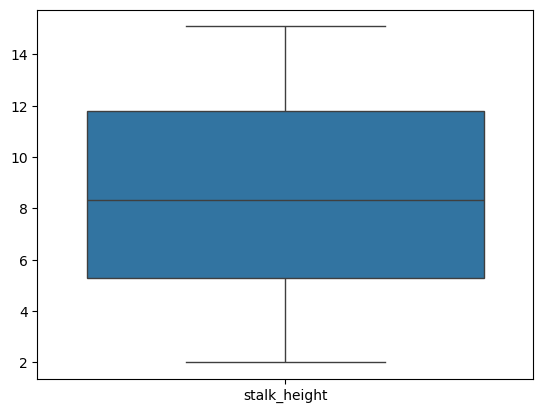

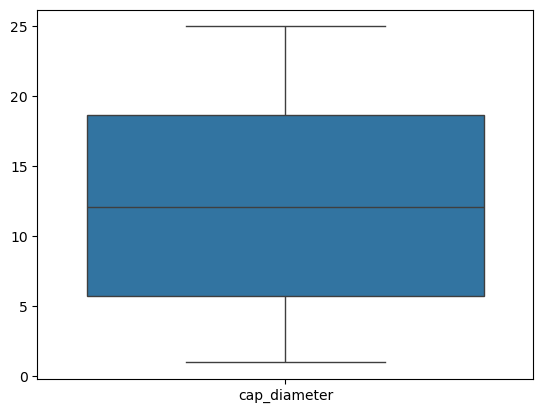

In [11]:
#checking for the outliers for numarical columns
numarical_columns = ['stalk_height','cap_diameter']
for col in numarical_columns:
    sns.boxplot(df[[col]])
    plt.show()

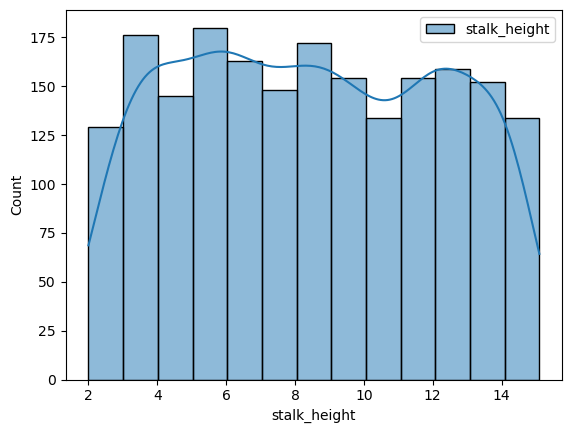

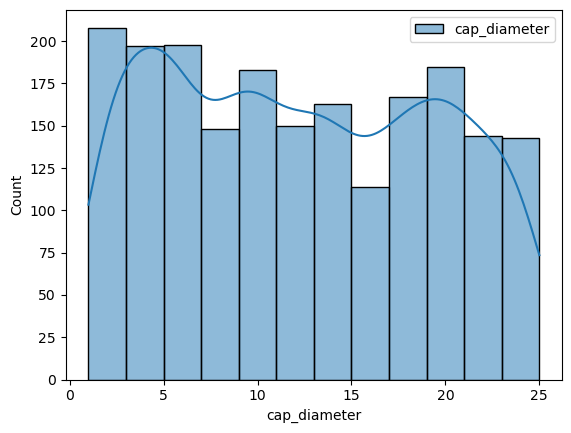

In [12]:
#checking for the distribution
numarical_columns = ['stalk_height','cap_diameter']
for col in numarical_columns:
    sns.histplot(df[[col]],kde = True)
    plt.xlabel(col)
    plt.show()

In [13]:
#checking for the skewness
numarical_columns = ['stalk_height','cap_diameter']
for col in numarical_columns:
    print(col,':',df[col].skew())

stalk_height : 0.0383116032695003
cap_diameter : 0.10759489701255188


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
std = StandardScaler()

In [16]:
df[['stalk_height','cap_diameter']] = std.fit_transform(df[['stalk_height','cap_diameter']]).astype(int)

In [17]:
df.head(15)

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,poisonous,1,-1
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,edible,-1,0
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,poisonous,0,0
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,poisonous,0,1
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,poisonous,1,0
5,2,1,4,0,8,0,1,0,6,0,...,1,2,1,6,7,3,6,poisonous,-1,0
6,0,3,0,0,1,2,2,0,2,1,...,0,2,2,2,4,3,1,poisonous,1,1
7,1,0,7,1,6,3,0,1,0,1,...,0,0,1,3,5,4,6,poisonous,0,1
8,1,1,3,1,7,0,1,1,2,1,...,1,3,2,1,3,5,6,edible,1,0
9,2,2,0,1,0,0,1,0,9,1,...,0,2,0,7,4,1,1,poisonous,0,-1


In [19]:
for col in df.select_dtypes(include = 'number'):
    print(col,":",df[col].unique())

cap_shape : [4 3 0 2 1]
cap_surface : [2 0 1 3]
cap_color : [7 6 5 4 8 0 3 1 2]
bruises : [0 1]
odor : [1 4 3 5 8 6 7 0 2]
gill_attachment : [1 3 2 0]
gill_spacing : [2 1 0]
gill_size : [0 1]
gill_color : [ 7  3  8  6  2  0  9  5  1 11 10  4]
stalk_shape : [1 0]
stalk_root : [2 6 1 4 3 0 5]
stalk_surface_above_ring : [3 2 1 0]
stalk_surface_below_ring : [2 1 3 0]
stalk_color_above_ring : [3 2 8 7 6 1 4 0 5]
stalk_color_below_ring : [8 0 3 5 7 6 4 1 2]
veil_type : [0 1]
veil_color : [0 3 2 1]
ring_number : [2 0 1]
ring_type : [6 0 4 2 3 1 7 5]
spore_print_color : [3 1 6 4 8 7 5 0 2]
population : [1 2 0 3 4 5]
habitat : [5 0 4 6 1 3 2]
stalk_height : [ 1 -1  0]
cap_diameter : [-1  0  1]


In [20]:
df['class'].unique()

array(['poisonous', 'edible'], dtype=object)

In [21]:
df['class'].map({'poisonous':0,'edible':1})

0       0
1       1
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: class, Length: 2000, dtype: int64

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [25]:
x = df.drop('class',axis = 1)
y = df['class']

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [46]:
model = SVC(C = 2.0,degree = 5,max_iter = -1,random_state = 42,verbose = 3)

In [47]:
print(model.get_params())

{'C': 2.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 5, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': 3}


In [48]:
model.fit(x_train,y_train)

[LibSVM]

SVC(C=2.0, degree=5, random_state=42, verbose=3)

In [49]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.785
0.725


In [58]:
model.fit(x_train,y_train)

[LibSVM]

SVC(C=2.0, degree=5, random_state=42, verbose=3)

In [59]:
para_grid ={
    'C': [0.1, 1, 10],   
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'] 
}

In [60]:
para_grid = GridSearchCV(
    estimator=model,
    param_grid=para_grid,
    cv=5,
    scoring='accuracy'
)

In [61]:
y_pred = model.predict(x_test)

In [62]:
print(accuracy_score(y_pred,y_test))

0.725


In [63]:
print(confusion_matrix(y_pred,y_test))

[[ 26   3]
 [107 264]]


In [64]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

      edible       0.20      0.90      0.32        29
   poisonous       0.99      0.71      0.83       371

    accuracy                           0.72       400
   macro avg       0.59      0.80      0.57       400
weighted avg       0.93      0.72      0.79       400



In [67]:
# Kernels to test
kernels = ['linear', 'poly', 'rbf']

results = {}

for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    results[kernel] = acc
    print(f"Kernel = {kernel:7s} → Accuracy = {acc:.4f}")

Kernel = linear  → Accuracy = 0.6675
Kernel = poly    → Accuracy = 0.7375
Kernel = rbf     → Accuracy = 0.6825


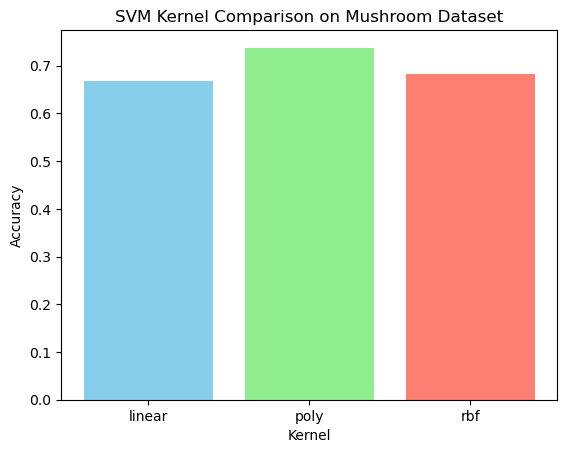

In [68]:
# Visualize results
plt.bar(results.keys(), results.values(), color=['skyblue','lightgreen','salmon'])
plt.xlabel("Kernel")
plt.ylabel("Accuracy")
plt.title("SVM Kernel Comparison on Mushroom Dataset")
plt.show()

In [ ]:
---->Strengths & Weaknesses of SVM on Mushroom Dataset
**Strengths
Good for high-dimensional data
Effective with clear class boundaries
Flexibility with kernels
**Weaknesses
Scalability
Interpretability
Parameter tuning

In [ ]:
------>Practical Implications of SVM in Real-World Classification
*********Real-world Applications
Medical Diagnosis
Text Classification
Face Recognition & Image Classification    